In [1]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
test_file = pd.read_csv("Data/test.csv")
train_file = pd.read_csv("Data/train.csv")
gendersub_file = pd.read_csv("Data/gender_submission.csv")

In [3]:
train_file.head(10)

#columns:
#passengerid, pclass, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
gendersub_file.head(10)

#we will need to save the passengerid from the train file
#because we are gonna used it to send the submission
passengers_id = train_file['PassengerId']
train_file = train_file.drop(columns = ['PassengerId'])

In [5]:
#checking the survived feature
train_file['Survived'].unique()

array([0, 1])

Text(0.5, 1.0, 'Survived')

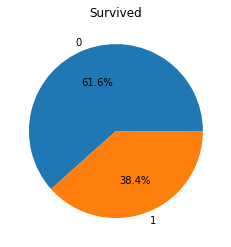

In [6]:
plt.pie(train_file['Survived'].value_counts(), labels=train_file['Survived'].value_counts().index, autopct='%1.1f%%')
plt.title("Survived")

#we can clearly see that most people died

Text(0.5, 1.0, 'Survived by Age')

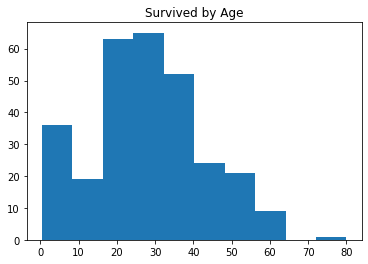

In [7]:
survived = train_file[train_file['Survived'] == 1]

plt.hist(survived['Age'])
plt.title("Survived by Age")
#the most people who survived was between 17~40 years old

In [8]:
#now we are gonna do the same, but using the "Sex" column
#but first we need to transform it in a numerical feature

from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
sex_column_encoded = encoder.fit_transform(train_file['Sex'])

train_file['Sex'] = sex_column_encoded

In [9]:
#1 = male
#2 = female

train_file.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


Text(0.5, 1.0, 'Survived by Sex')

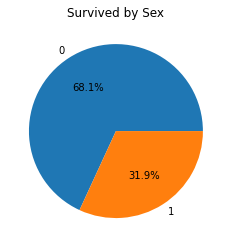

In [10]:
survived = train_file[train_file['Survived'] == 1]

plt.pie(survived['Sex'].value_counts(), labels=survived['Sex'].value_counts().index, autopct='%1.1f%%')
plt.title("Survived by Sex")

#most of the survivors are women

(array([17.,  5., 11., 29., 13.,  9.,  6.,  2.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

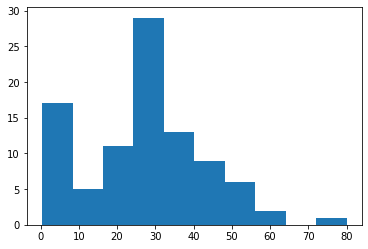

In [11]:
men_survived = survived[survived['Sex'] == 1]
plt.hist(men_survived['Age'])

#the males who most survived were between 27~31 years old

(array([17.,  4., 32., 34., 32., 32., 17., 13.,  9.,  7.]),
 array([ 0.75 ,  6.975, 13.2  , 19.425, 25.65 , 31.875, 38.1  , 44.325,
        50.55 , 56.775, 63.   ]),
 <BarContainer object of 10 artists>)

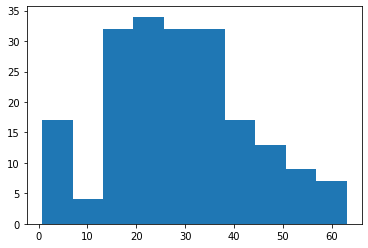

In [12]:
men_survived = survived[survived['Sex'] == 0]
plt.hist(men_survived['Age'])

#the females who most survived were between 13~37 years old

Text(0.5, 1.0, 'Pclass values')

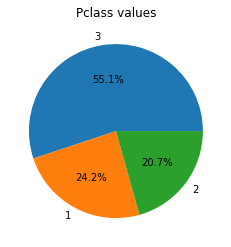

In [13]:
#lets check the pclass

plt.pie(train_file['Pclass'].value_counts(), labels=train_file['Pclass'].value_counts().index, autopct="%1.1f%%")
plt.title("Pclass values")

#we have tree possible values for pclass: 1, 2 and 3

Text(0.5, 1.0, 'Survived by Pclass')

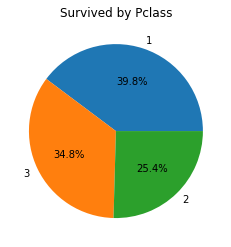

In [14]:
plt.pie(survived['Pclass'].value_counts(), labels=survived['Pclass'].value_counts().index, autopct="%1.1f%%")
plt.title("Survived by Pclass")

#almost 40% of the survivors was from the pclass 1
#and 35% from pclass 3
#so passengers from that class have a bigger chance to survive

([<matplotlib.patches.Wedge at 0x7ff7c7259820>,
 [Text(-0.8275031118894706, 0.7247334681199997, 'U'),
  Text(0.3670961927005178, -1.036937985274329, 'C'),
  Text(0.7203468542172404, -0.8313244911701604, 'B'),
  Text(0.9232762920857227, -0.5979639524857995, 'D'),
  Text(1.034982006806026, -0.3725751542813491, 'E'),
  Text(1.0822631515781524, -0.19673960134178708, 'A'),
  Text(1.0963848700591308, -0.08910789362016726, 'F'),
  Text(1.099753855369629, -0.023269241492516957, 'G'),
  Text(1.0999931626376394, -0.003878421127741824, 'T')],
 [Text(-0.451365333757893, 0.3953091644290907, '77.1%'),
  Text(0.20023428692755513, -0.5656025374223612, '6.6%'),
  Text(0.39291646593667656, -0.45344972245645104, '5.3%'),
  Text(0.5036052502285759, -0.3261621559013452, '3.7%'),
  Text(0.5645356400760142, -0.2032228114261904, '3.6%'),
  Text(0.5903253554062649, -0.10731250982279295, '1.7%'),
  Text(0.598028110941344, -0.04860430561100031, '1.5%'),
  Text(0.5998657392925248, -0.012692313541372886, '0.4%'),


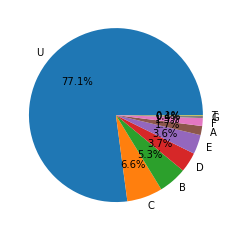

In [15]:
#U for Unknown
train_file['Cabin'].fillna("U", inplace=True)

#we are going to pick only the letter of the cabin
#so we can see how many cabins had (A, B, C, D, E, F, G, U(Unknown cabin))
train_file['Cabin'] = train_file['Cabin'].str[0]

plt.pie(train_file['Cabin'].value_counts(), labels=train_file['Cabin'].value_counts().index, autopct="%1.1f%%")

In [16]:
cabin_dummies = pd.get_dummies(train_file['Cabin'], prefix="Cabin")

train_file = pd.concat([train_file, cabin_dummies], axis=1)

#dropping the old unformated 'cabin' column
train_file = train_file.drop(columns=['Cabin'])
train_file

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,0,0,0,0,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,0,0,1,0,0,0,0,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,0,0,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,0,1,0,0,0,0,0,0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S,0,0,0,0,0,0,0,0,1
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S,0,1,0,0,0,0,0,0,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,S,0,0,0,0,0,0,0,0,1
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C,0,0,1,0,0,0,0,0,0


In [17]:
#let's see the ticket column

train_file['Ticket'].value_counts()

#we have almost 700 unique values, so probably it is not worth it use it
#let's drop it
 
train_file = train_file.drop(columns=['Ticket'])
train_file

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,0,0,0,0,0,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,0,0,1,0,0,0,0,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,0,0,0,0,0,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,0,0,1,0,0,0,0,0,0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,S,0,0,0,0,0,0,0,0,1
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,S,0,1,0,0,0,0,0,0,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.4500,S,0,0,0,0,0,0,0,0,1
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,C,0,0,1,0,0,0,0,0,0


Text(0.5, 1.0, 'Embarked values')

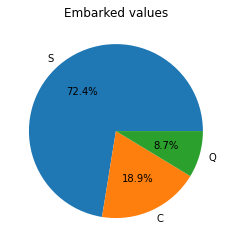

In [18]:
#now let's check the 'embarked' column

plt.pie(train_file['Embarked'].value_counts(), labels=train_file['Embarked'].value_counts().index, autopct="%1.1f%%")
plt.title("Embarked values")

# S = Southampton
# C = Cherbourg
# Q = Queenstown

Text(0.5, 1.0, 'Survived by Embarked')

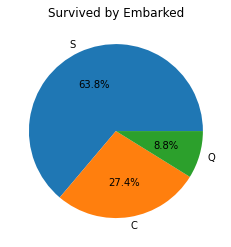

In [19]:
plt.pie(survived['Embarked'].value_counts(), labels=survived['Embarked'].value_counts().index, autopct="%1.1f%%")
plt.title("Survived by Embarked")

#almost 64% of the survivors were from the Embarked S (Southampton)

In [20]:
#let's check the sibsp and parch columns
#sibsp = # of siblings / spouses aboard the Titanic
#parch = # of parents / children aboard the Titanic

train_file[['SibSp', 'Parch']].isnull().sum()

SibSp    0
Parch    0
dtype: int64

(array([[608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.],
        [678., 118.,  80.,   5.,   0.,   4.,   5.,   1.,   0.,   0.]]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 2 BarContainer objects>)

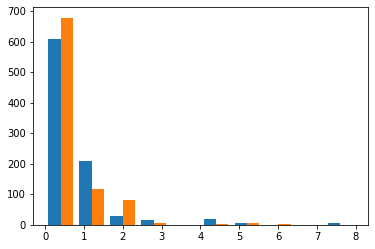

In [21]:
plt.hist(train_file[['SibSp', 'Parch']])

In [22]:
train_file['TotalAboard'] = train_file['SibSp'] + train_file['Parch']
train_file.drop(columns=['SibSp', 'Parch'], inplace=True)
train_file

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,TotalAboard
0,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,S,0,0,0,0,0,0,0,0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,C,0,0,1,0,0,0,0,0,0,1
2,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,S,0,0,0,0,0,0,0,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,S,0,0,1,0,0,0,0,0,0,1
4,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,S,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,13.0000,S,0,0,0,0,0,0,0,0,1,0
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,30.0000,S,0,1,0,0,0,0,0,0,0,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,23.4500,S,0,0,0,0,0,0,0,0,1,3
889,1,1,"Behr, Mr. Karl Howell",1,26.0,30.0000,C,0,0,1,0,0,0,0,0,0,0


In [23]:
train_file['isAlone'] = np.where(train_file['TotalAboard'] > 0, 0, 1)
train_file.drop(columns=['TotalAboard'], inplace=True)
train_file.head(10)

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,isAlone
0,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,S,0,0,0,0,0,0,0,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,C,0,0,1,0,0,0,0,0,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,S,0,0,0,0,0,0,0,0,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,S,0,0,1,0,0,0,0,0,0,0
4,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,S,0,0,0,0,0,0,0,0,1,1
5,0,3,"Moran, Mr. James",1,NaN,8.4583,Q,0,0,0,0,0,0,0,0,1,1
6,0,1,"McCarthy, Mr. Timothy J",1,54.0,51.8625,S,0,0,0,0,1,0,0,0,0,1
7,0,3,"Palsson, Master. Gosta Leonard",1,2.0,21.0750,S,0,0,0,0,0,0,0,0,1,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,11.1333,S,0,0,0,0,0,0,0,0,1,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,30.0708,C,0,0,0,0,0,0,0,0,1,0


In [24]:
#let's check the 'fare' columnn

train_file['Fare'].isnull().sum()

0

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

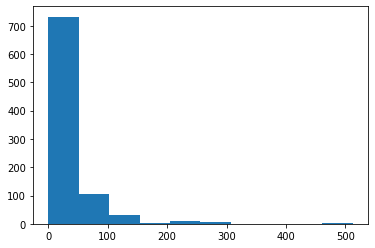

In [25]:
plt.hist(train_file['Fare'])